In [1]:
%load_ext autoreload
%autoreload 2

import evaluation
import pandas
import os
import visualization as vis
import mir_eval
from glob import glob
import numpy as np
import datasets

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

experiments_dir = "../experimenty/voicing/models-voicing1/"

from common_jupyter import *

split=None

\begin{tabular}{llrrr}
\toprule
         Model & Pooling &    VR &   VFA &    VA \\
\midrule
   full\_1layer &    None & 0.818 & 0.606 & 0.616 \\
   full\_1layer &     avg & 0.820 & 0.600 & 0.616 \\
   full\_1layer &     max & 0.830 & 0.589 & 0.628 \\
   note\_1layer &    None & 0.722 & 0.451 & 0.636 \\
   note\_1layer &     avg & 0.751 & 0.547 & 0.605 \\
   note\_1layer &     max & 0.733 & 0.477 & 0.626 \\
  note\_dilated &    None & 0.720 & 0.441 & 0.636 \\
  note\_dilated &     avg & 0.680 & 0.473 & 0.595 \\
  note\_dilated &     max & 0.668 & 0.413 & 0.617 \\
     note\_note &    None & 0.701 & 0.401 & 0.648 \\
     note\_note &     avg & 0.722 & 0.519 & 0.602 \\
     note\_note &     max & 0.682 & 0.436 & 0.619 \\
 octave\_1layer &    None & 0.789 & 0.523 & 0.638 \\
 octave\_1layer &     avg & 0.793 & 0.527 & 0.634 \\
 octave\_1layer &     max & 0.809 & 0.561 & 0.628 \\
 octave\_octave &    None & 0.588 & 0.337 & 0.617 \\
 octave\_octave &     avg & 0.709 & 0.454 & 0.624 \\
 octav

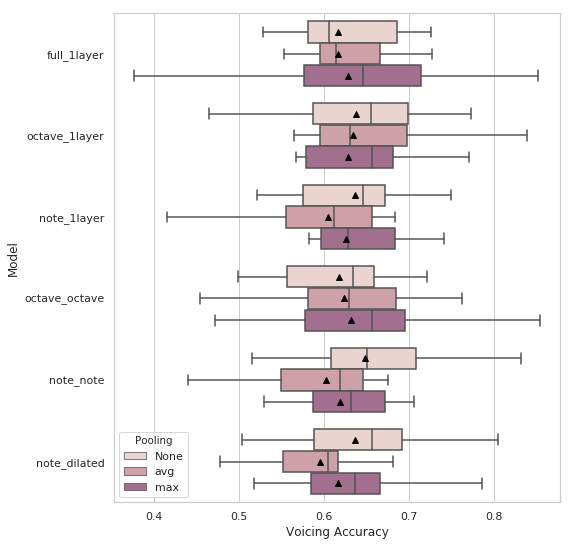

In [9]:
# Vliv pooling vrstvy

paths = get_paths(experiments_dir)
regex = "models-voicing1/.*-fpt(max|avg|None)-.*-cm8-a(full_1layer|octave_1layer|note_1layer|octave_octave|note_note|note_dilated)-cc0-b.-d0.0-llconv-lcc0.*/model-f0-outputs$"
filter_list = ["0406_025326", "0406_101753"]
paths = list(filter(lambda x: re.search(regex, x) and all([model not in x for model in filter_list]), paths))

attr_names = [
"Model", "Pooling"
]
attributes = get_attrs_from_paths(regex, [str, str], paths)
attributes = list(map(lambda x: tuple(reversed(x)), attributes))

a = map(str, zip([p.split("/")[-2] for p in paths], attributes))
# print("\n".join(a))

data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "voicing_pooling", plot_metric="Voicing Accuracy", drop_metrics=["Raw Pitch Accuracy", "Raw Chroma Accuracy", "Overall Accuracy"])
to_latex(summary)

\begin{tabular}{llrrr}
\toprule
         Model & Batchnorm &    VR &   VFA &    VA \\
\midrule
   full\_1layer &         0 & 0.849 & 0.678 & 0.598 \\
   full\_1layer &         1 & 0.825 & 0.632 & 0.610 \\
   note\_1layer &         0 & 0.767 & 0.485 & 0.644 \\
   note\_1layer &         1 & 0.791 & 0.519 & 0.642 \\
  note\_dilated &         0 & 0.720 & 0.426 & 0.646 \\
  note\_dilated &         1 & 0.686 & 0.362 & 0.656 \\
     note\_note &         0 & 0.761 & 0.439 & 0.659 \\
     note\_note &         1 & 0.758 & 0.424 & 0.666 \\
 octave\_1layer &         0 & 0.841 & 0.557 & 0.647 \\
 octave\_1layer &         1 & 0.832 & 0.586 & 0.629 \\
 octave\_octave &         0 & 0.845 & 0.607 & 0.631 \\
 octave\_octave &         1 & 0.824 & 0.564 & 0.636 \\
\bottomrule
\end{tabular}



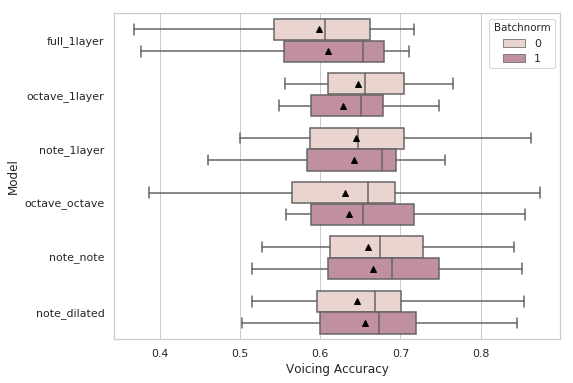

In [12]:
# Vliv batchnorm

paths = get_paths(experiments_dir)
regex = "models-voicing1/.*-fptNone-.*-cm8-a(full_1layer|octave_1layer|note_1layer|octave_octave|note_note|note_dilated|note_octave|octave_note)-cc0-b(0|1)-d0.3-llconv-lcc0(|-hs1)/model-f0-outputs$"
paths = list(filter(lambda x: re.search(regex, x), paths))

attr_names = [
"Model", "Batchnorm"
]
attributes = get_attrs_from_paths(regex, [str, str], paths)

a = map(str, zip([p.split("/")[-2] for p in paths], attributes))
# print("\n".join(a))

data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "voicing_batchnorm", plot_metric="Voicing Accuracy", drop_metrics=["Raw Pitch Accuracy", "Raw Chroma Accuracy", "Overall Accuracy"])
to_latex(summary)
# plot_data(data[data.hs=="hs1" ^ data.hs=="b0"], attr_names, split=None, )

\begin{tabular}{llrrr}
\toprule
         Model & Dropout &    VR &   VFA &    VA \\
\midrule
   full\_1layer &     0.0 & 0.782 & 0.565 & 0.618 \\
   full\_1layer &     0.3 & 0.825 & 0.632 & 0.610 \\
   note\_1layer &     0.0 & 0.691 & 0.418 & 0.634 \\
   note\_1layer &     0.3 & 0.791 & 0.519 & 0.642 \\
  note\_dilated &     0.0 & 0.720 & 0.441 & 0.636 \\
  note\_dilated &     0.3 & 0.686 & 0.362 & 0.656 \\
     note\_note &     0.0 & 0.743 & 0.438 & 0.648 \\
     note\_note &     0.3 & 0.758 & 0.424 & 0.666 \\
 octave\_1layer &     0.0 & 0.610 & 0.357 & 0.625 \\
 octave\_1layer &     0.3 & 0.832 & 0.586 & 0.629 \\
 octave\_octave &     0.0 & 0.588 & 0.337 & 0.617 \\
 octave\_octave &     0.3 & 0.824 & 0.564 & 0.636 \\
\bottomrule
\end{tabular}



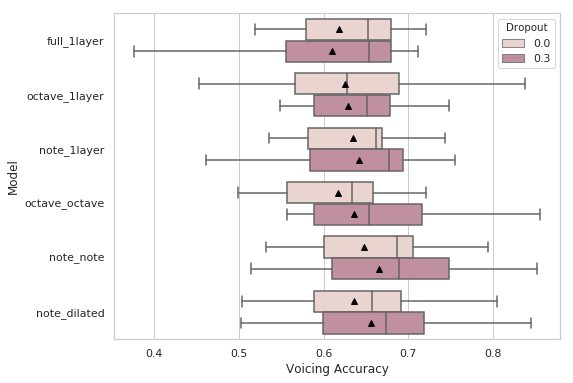

In [11]:
# Vliv dropout

paths = get_paths(experiments_dir)
regex = "models-voicing1/.*-fptNone-fps1,5-fps1,5-cm8-a(full_1layer|octave_1layer|note_1layer|octave_octave|note_note|note_dilated|note_octave|octave_note)-cc0-b1-d(0.0|0.3)-llconv-lcc0(|-hs1)/model-f0-outputs$"
paths = list(filter(lambda x: re.search(regex, x), paths))

attr_names = [
"Model", "Dropout"
]
attributes = get_attrs_from_paths(regex, [str, str], paths)

a = map(str, zip([p.split("/")[-2] for p in paths], attributes))
#print("\n".join(a))

data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "voicing_dropout", plot_metric="Voicing Accuracy", drop_metrics=["Raw Pitch Accuracy", "Raw Chroma Accuracy", "Overall Accuracy"])
to_latex(summary)

\begin{tabular}{lrrrr}
\toprule
         Model & Mult. Koef. Kapacity &    VR &   VFA &    VA \\
\midrule
   full\_1layer &                    8 & 0.825 & 0.632 & 0.610 \\
   full\_1layer &                   16 & 0.923 & 0.765 & 0.601 \\
   full\_1layer &                   32 & 0.858 & 0.690 & 0.600 \\
   note\_1layer &                    8 & 0.791 & 0.519 & 0.642 \\
   note\_1layer &                   16 & 0.845 & 0.583 & 0.641 \\
   note\_1layer &                   32 & 0.829 & 0.565 & 0.641 \\
  note\_dilated &                    8 & 0.686 & 0.362 & 0.656 \\
  note\_dilated &                   16 & 0.766 & 0.474 & 0.649 \\
  note\_dilated &                   32 & 0.694 & 0.395 & 0.646 \\
     note\_note &                    8 & 0.758 & 0.424 & 0.666 \\
     note\_note &                   16 & 0.711 & 0.368 & 0.662 \\
     note\_note &                   32 & 0.676 & 0.338 & 0.659 \\
 octave\_1layer &                    8 & 0.832 & 0.586 & 0.629 \\
 octave\_1layer &                   

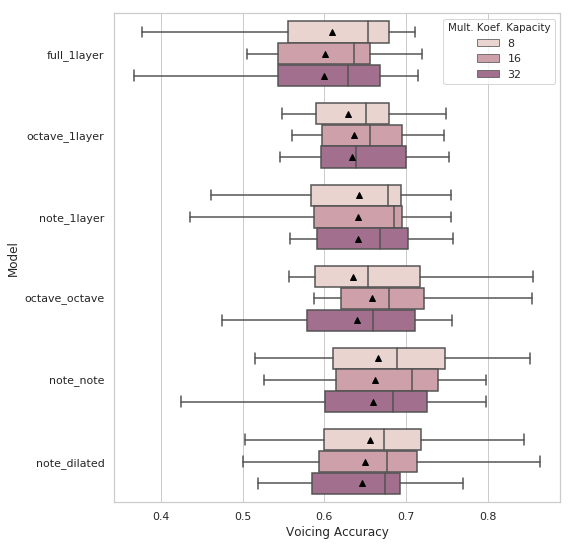

In [13]:
# Vliv kapacity

paths = get_paths(experiments_dir)
regex = "models-voicing1/.*-fptNone-fps1,5-fps1,5-cm(8|16|32)-a(full_1layer|octave_1layer|note_1layer|octave_octave|note_note|note_dilated|note_octave|octave_note)-cc0-b1-d0.3-llconv-lcc0(|-hs1)/model-f0-outputs$"
paths = list(filter(lambda x: re.search(regex, x), paths))

attr_names = [
"Model", "Mult. Koef. Kapacity"
]
attributes = get_attrs_from_paths(regex, [int, str], paths)
attributes = list(map(lambda x: tuple(reversed(x)), attributes))

a = map(str, zip([p.split("/")[-2] for p in paths], attributes))
# print("\n".join(a))

data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "voicing_capacity", plot_metric="Voicing Accuracy", drop_metrics=["Raw Pitch Accuracy", "Raw Chroma Accuracy", "Overall Accuracy"])
to_latex(summary)

In [6]:
# Vliv harmonic stacking

paths = get_paths(experiments_dir)
regex = "models-voicing1/.*-fptNone-fps1,5-fps1,5-(cm.*-anote_octave-cc0-b.*-d.*-llconv-lcc.*)-(hs1|hs6)/model-f0-outputs$"
paths = list(filter(lambda x: re.search(regex, x), paths))

attr_names = [
"Model", "Harmonická transformace"
]
attributes = get_attrs_from_paths(regex, [str, str], paths)
# attributes = list(map(lambda x: tuple(reversed(x)), attributes))

a = map(str, zip([p.split("/")[-2] for p in paths], attributes))
print("\n".join(a))

data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "voicing_capacity", plot_metric="Voicing Accuracy", drop_metrics=["Raw Pitch Accuracy", "Raw Chroma Accuracy", "Overall Accuracy"])

ValueError: No objects to concatenate

('0406_043123-voicing-dmdb-bs32-s44100-hs1-fw512-cw2560-inTrue-apw10-mn24-nr72-bps5-as0.25-lr0.001-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-scqt-fptNone-fps1,5-fps1,5-cm16-afull_1layer-cc0-b1-d0.3-llconv-lcc0', ['cm16-afull_1layer', '0'])
('0406_140907-voicing-dmdb-bs32-s44100-hs1-fw512-cw2560-inTrue-apw10-mn24-nr72-bps5-as0.25-lr0.001-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-scqt-fptNone-fps1,5-fps1,5-cm16-aoctave_1layer-cc0-b1-d0.3-llconv-lcc0', ['cm16-aoctave_1layer', '0'])
('0406_144342-voicing-dmdb-bs32-s44100-hs1-fw512-cw2560-inTrue-apw10-mn24-nr72-bps5-as0.25-lr0.001-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-scqt-fptNone-fps1,5-fps1,5-cm16-anote_1layer-cc0-b1-d0.3-llconv-lcc0', ['cm16-anote_1layer', '0'])
('0407_220612-voicing-dmdb-bs32-s44100-hs1-fw512-cw2560-inTrue-apw10-mn24-nr72-bps5-as0.25-lr0.001-lrd1.0-lrds100000-cg0.0-llw0.0-mw1.0-scqt-fptNone-fps1,5-fps1,5-cm16-afull_1layer-cc1-b1-d0.3-llconv-lcc0', ['cm16-afull_1layer', '1'])
('0407_223933-voicing-dmdb-bs32-s44100-hs1-fw512-cw2560-

\begin{tabular}{llrrr}
\toprule
                             Model & Kontext &    VR &   VFA &    VA \\
\midrule
                 cm16-afull\_1layer &       0 & 0.923 & 0.765 & 0.601 \\
                 cm16-afull\_1layer &       1 & 0.844 & 0.655 & 0.609 \\
                 cm16-afull\_1layer &       2 & 0.893 & 0.708 & 0.612 \\
                 cm16-anote\_1layer &       0 & 0.845 & 0.583 & 0.641 \\
                 cm16-anote\_1layer &       1 & 0.830 & 0.556 & 0.645 \\
                 cm16-anote\_1layer &       2 & 0.795 & 0.500 & 0.652 \\
                   cm16-anote\_note &       0 & 0.716 & 0.362 & 0.668 \\
                   cm16-anote\_note &       1 & 0.703 & 0.381 & 0.658 \\
                   cm16-anote\_note &       2 & 0.670 & 0.341 & 0.662 \\
               cm16-aoctave\_1layer &       0 & 0.842 & 0.588 & 0.636 \\
               cm16-aoctave\_1layer &       1 & 0.763 & 0.500 & 0.637 \\
               cm16-aoctave\_1layer &       2 & 0.861 & 0.620 & 0.634 \\
           

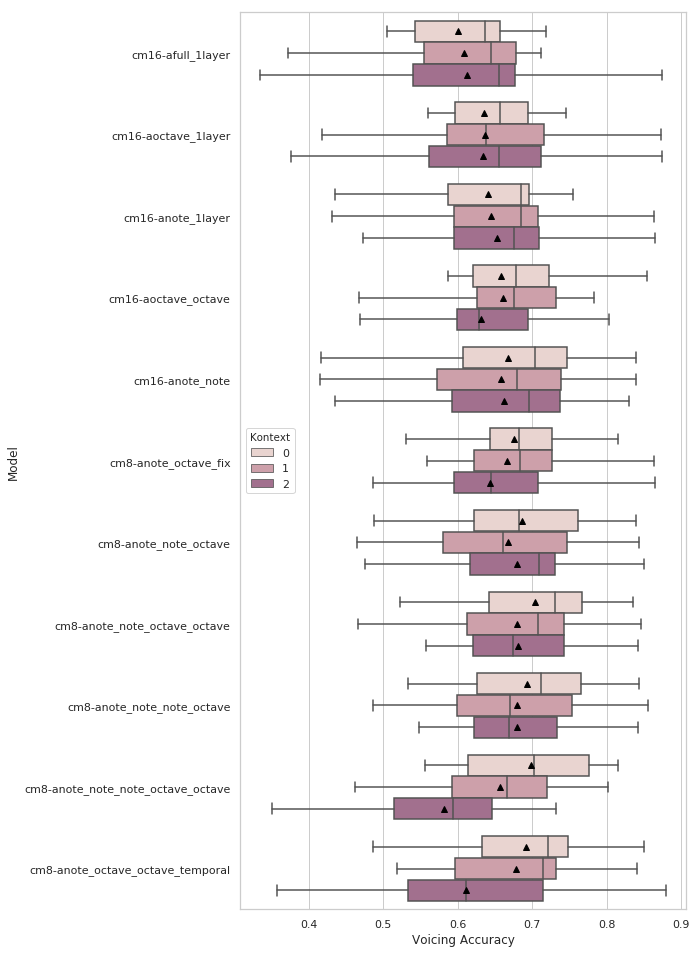

In [14]:
# Vliv harmonic kontextu

paths = get_paths(experiments_dir)
regex = "models-voicing1/.*-fptNone-fps1,5-fps1,5-(.*)-cc(.*)-b.-d0.3-llconv-lcc0.*/model-f0-outputs$"
filter_list = ['cm8-afull_1layer','cm32-afull_1layer','cm8-aoctave_1layer',"cm8-anote_1layer",
               "cm32-aoctave_1layer-", "cm32-anote_1layer-", "cm8-aoctave_octave-", "cm32-aoctave_octave-",
               "cm8-anote_note-", "cm32-anote_note-", "anote_dilated-", "cm8-anote_octave-",
               "cm8-aoctave_note-", "cm32-aoctave_note-", "cm32-anote_octave-"]
paths = list(filter(lambda x: re.search(regex, x) and all([model not in x for model in filter_list]), paths))

attr_names = [
"Model", "Kontext"
]
attributes = get_attrs_from_paths(regex, [str, str], paths)
# attributes = list(map(lambda x: tuple(reversed(x)), attributes))

a = map(str, zip([p.split("/")[-2] for p in paths], attributes))
print("\n".join(a))

data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "voicing_context", plot_metric="Voicing Accuracy", drop_metrics=["Raw Pitch Accuracy", "Raw Chroma Accuracy", "Overall Accuracy"])
to_latex(summary)

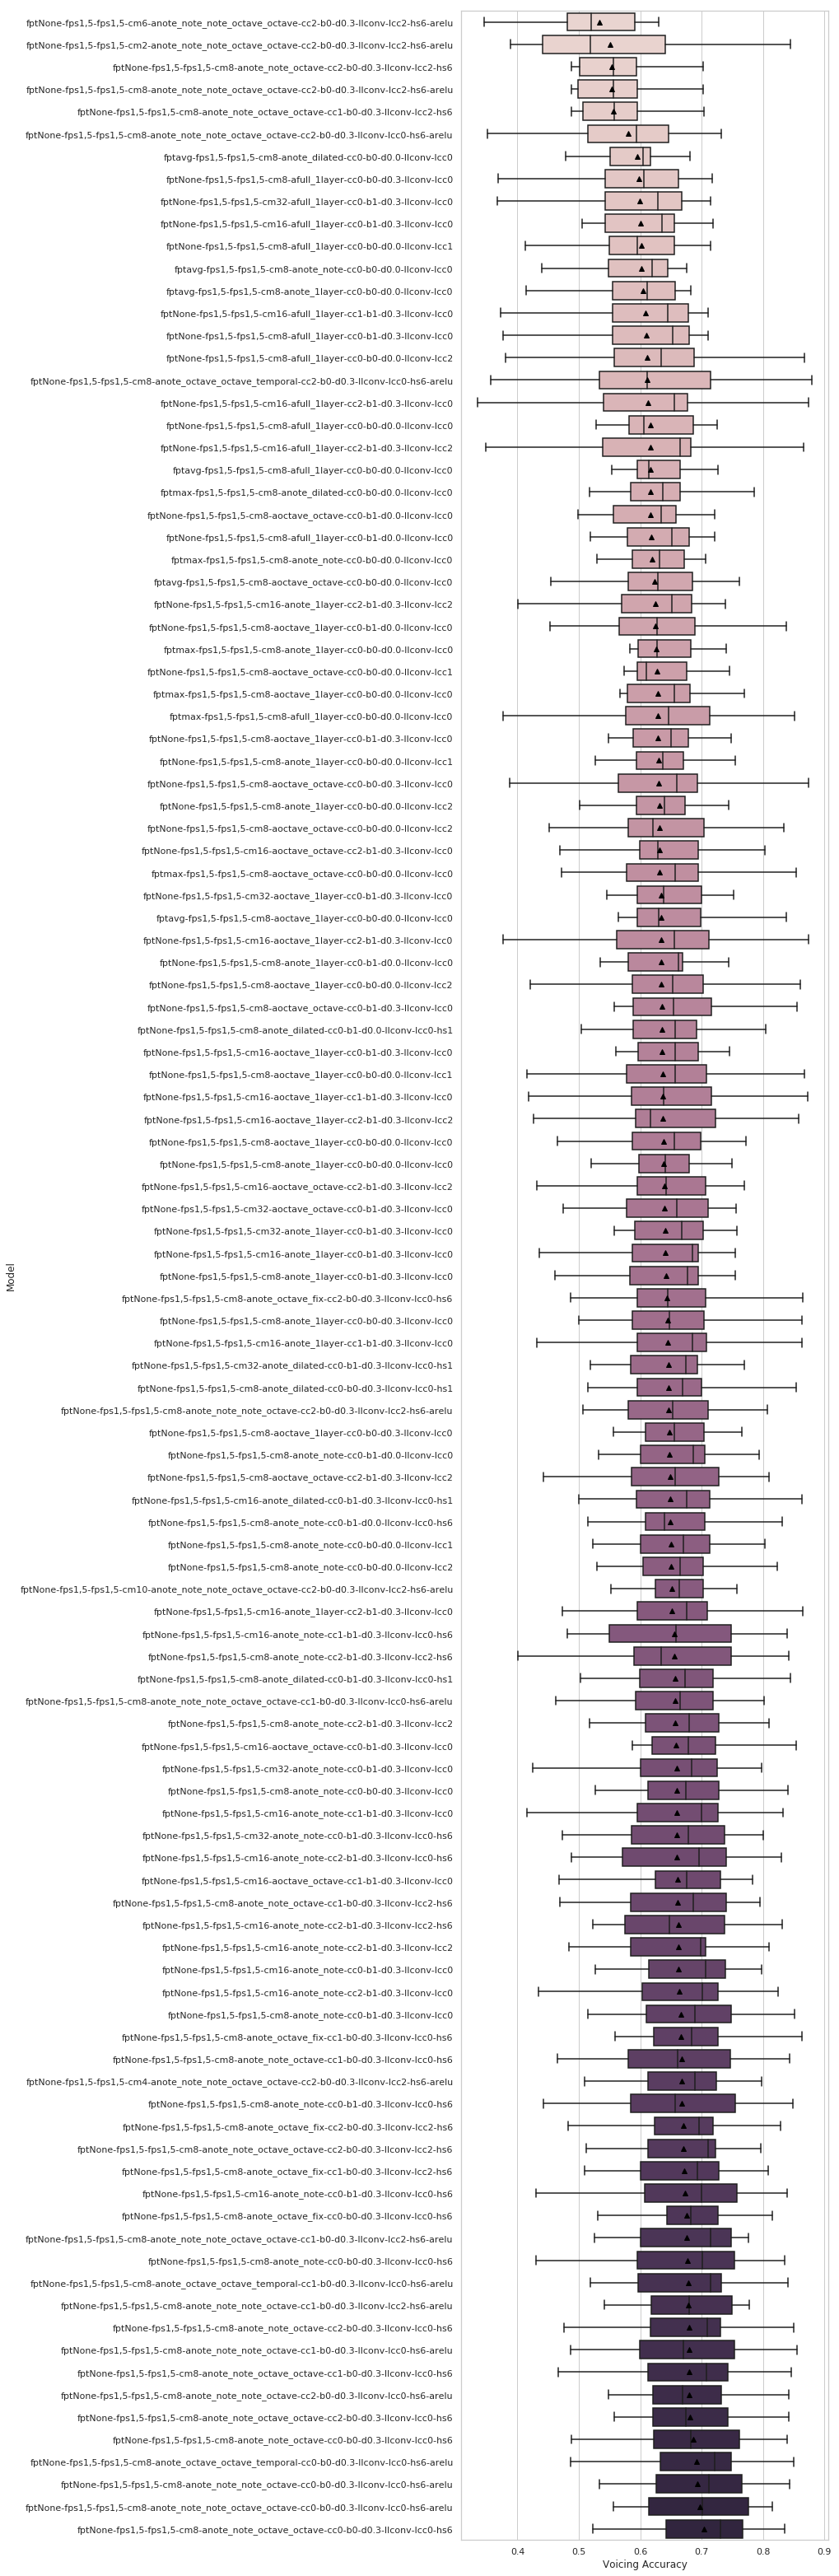

In [8]:
# Nejlepší
paths = get_paths(experiments_dir)
regex = "models-voicing1/.*-scqt-(.*)/model-f0-outputs$"
filter_list = []
paths = list(filter(lambda x: re.search(regex, x) and all([model not in x for model in filter_list]), paths))

attr_names = [
"Model"
]
attributes = get_attrs_from_paths(regex, [str, str], paths)
attributes = list(map(lambda x: tuple(reversed(x)), attributes))

a = map(str, zip([p.split("/")[-2] for p in paths], attributes))
# print("\n".join(a))

data = load_data(paths, attributes, attr_names)
summary = plot_data(data, attr_names, "voicing_pooling", plot_metric="Voicing Accuracy", order="Voicing Accuracy", drop_metrics=["Raw Pitch Accuracy", "Raw Chroma Accuracy", "Overall Accuracy"])